In [1]:
%matplotlib inline

Graphs for minute_aggregated/ddos.featureset.csv


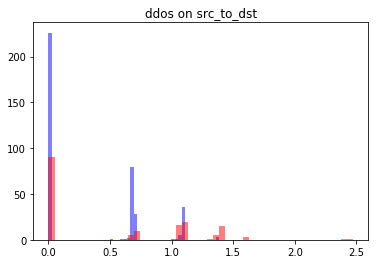

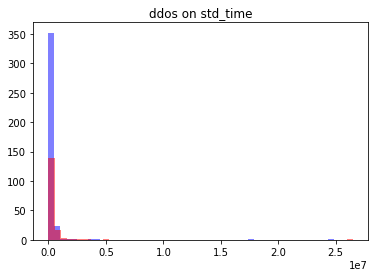

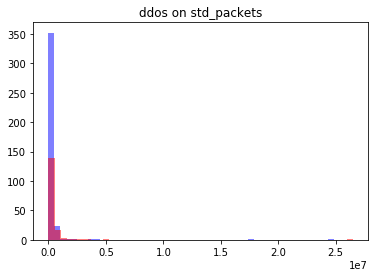

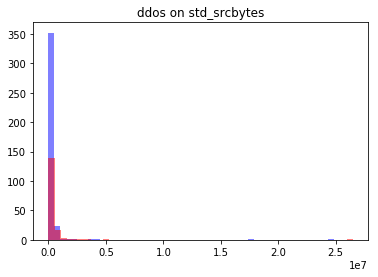

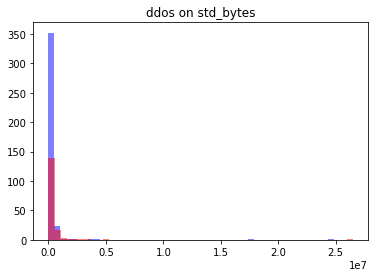

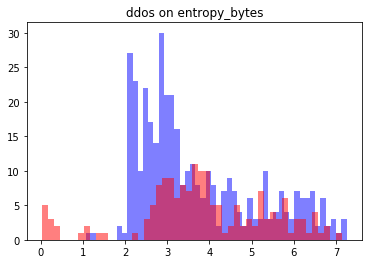

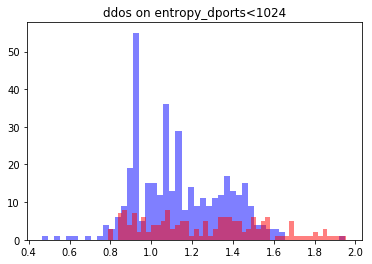

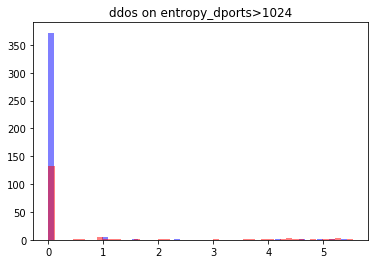

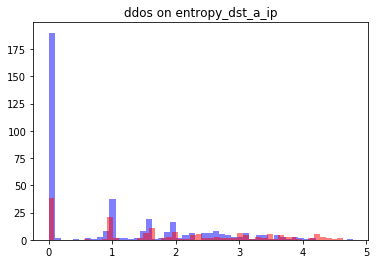

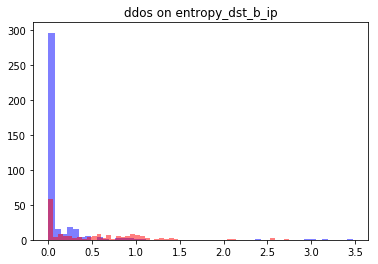

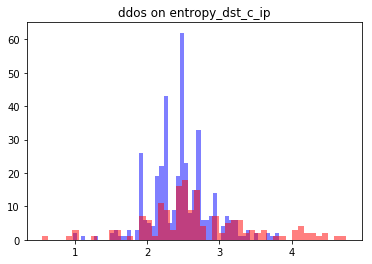

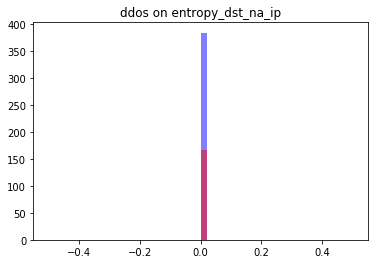

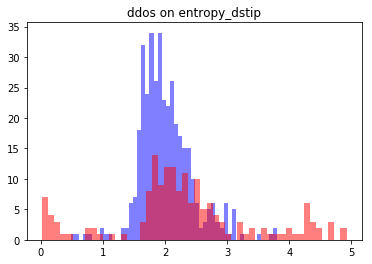

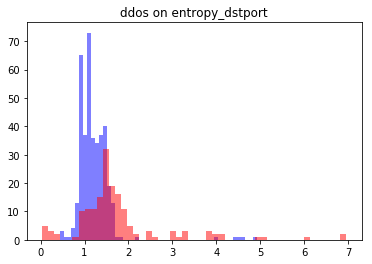

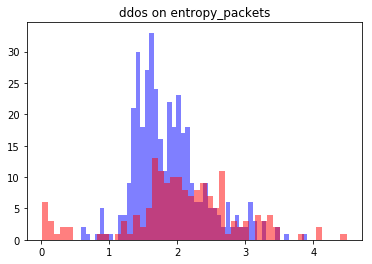

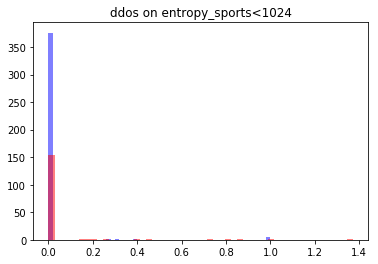

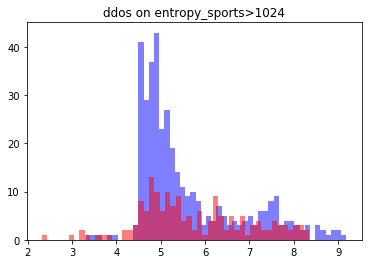

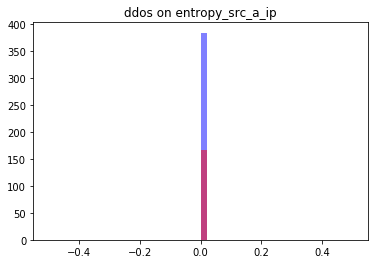

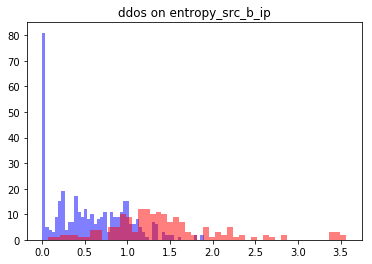

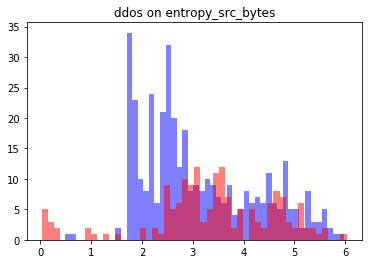

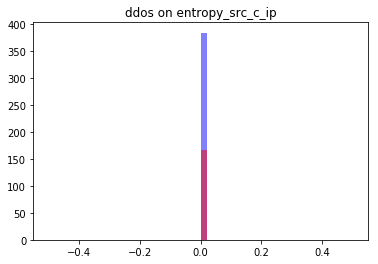

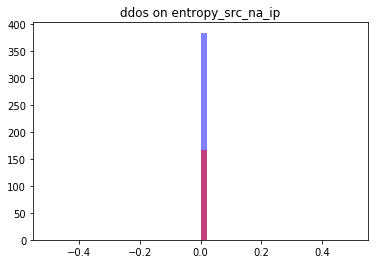

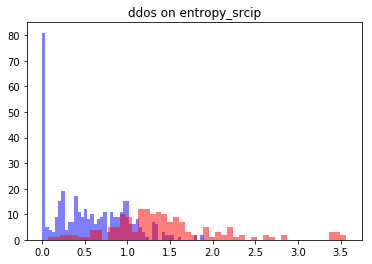

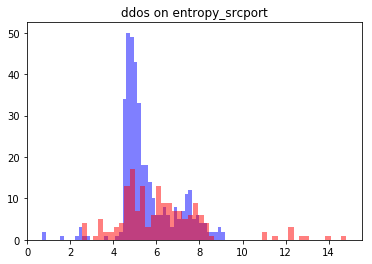

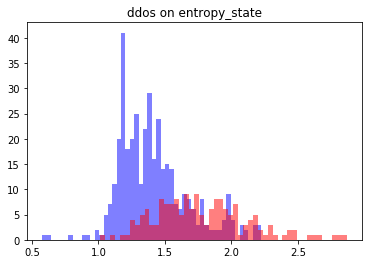

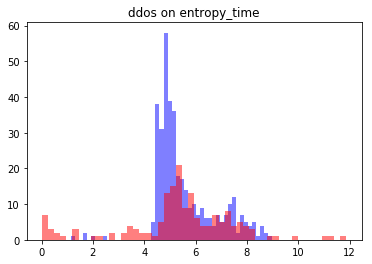

Graphs for minute_aggregated/ddos-2.featureset.csv


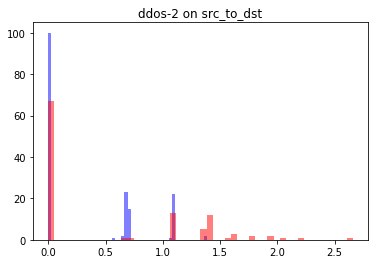

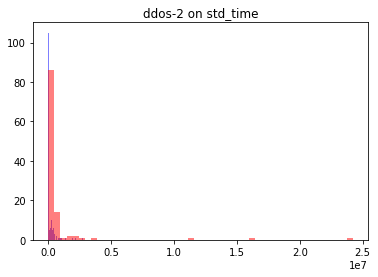

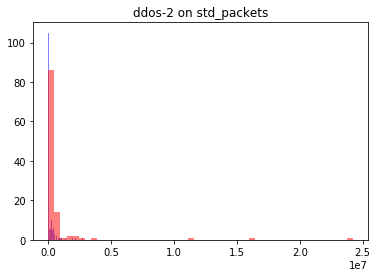

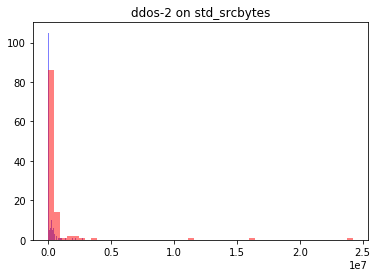

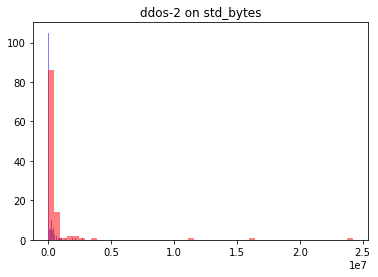

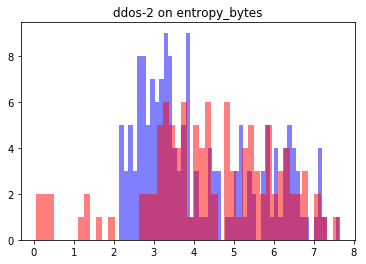

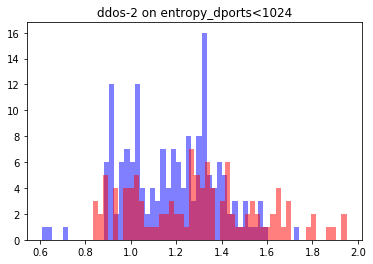

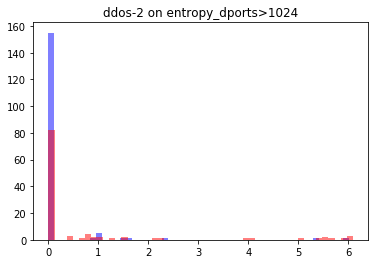

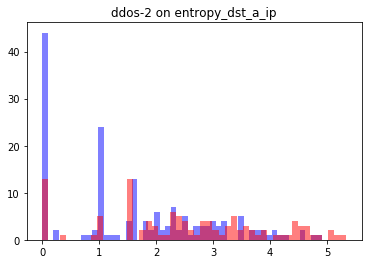

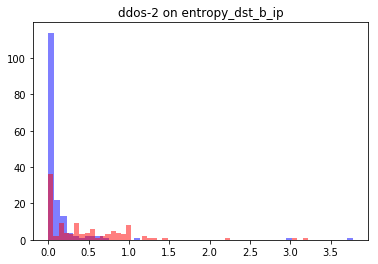

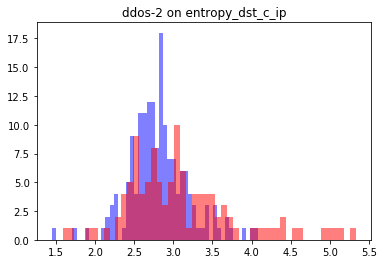

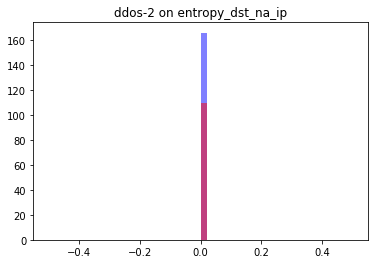

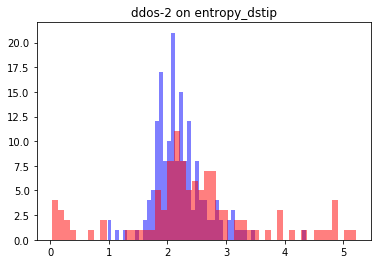

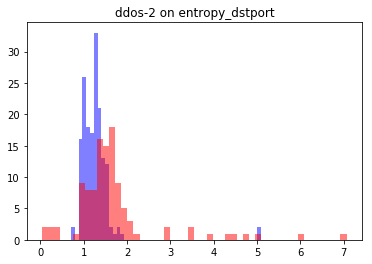

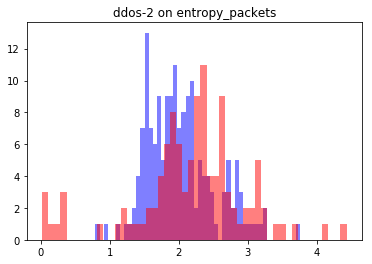

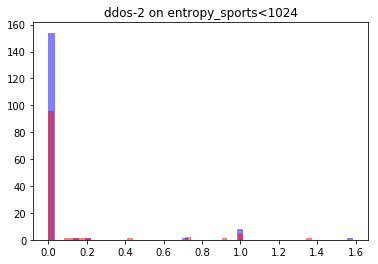

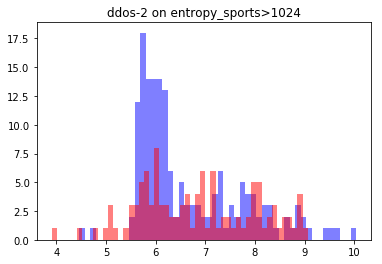

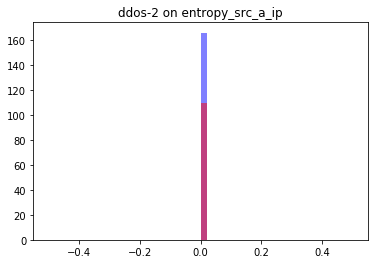

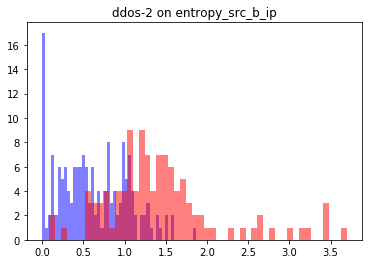

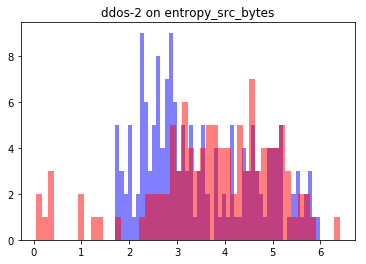

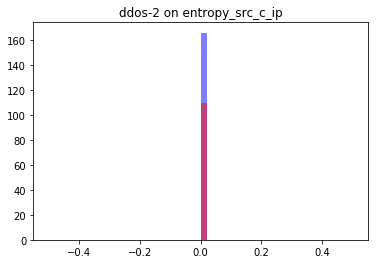

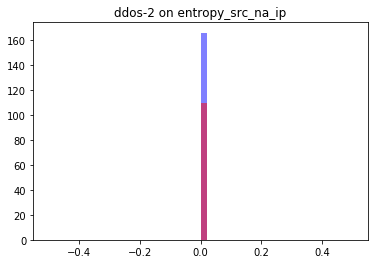

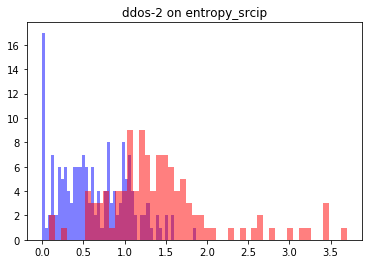

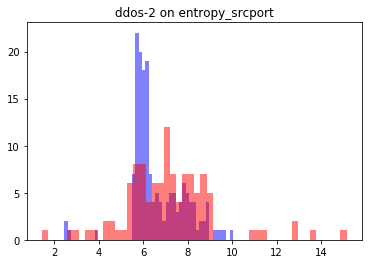

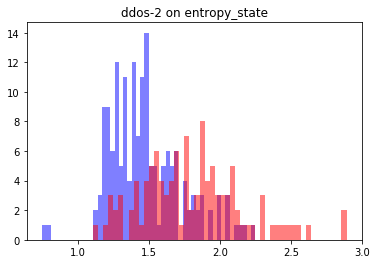

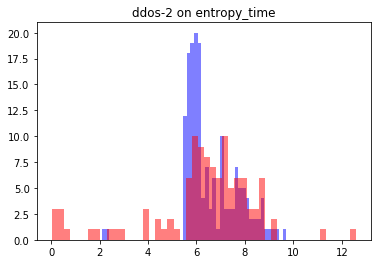

In [3]:
from plot_features import plot_histogram_of
from summarizer import Summarizer

files = [
    'minute_aggregated/ddos.featureset.csv',
    'minute_aggregated/ddos-2.featureset.csv'
]
features = [
        'src_to_dst',
        'entropy_packets',
        'entropy_src_bytes',
        'entropy_bytes',
        'entropy_time',
        'entropy_dstport',
        'entropy_srcport',
        'entropy_srcip',
        'entropy_dstip',
        'entropy_sports>1024',
        'entropy_sports<1024',
        'entropy_dports>1024',
        'entropy_dports<1024',
        'entropy_state',
        'std_bytes',

]
features = ['src_to_dst', 'std_time', 'std_packets', 'std_srcbytes',
           'std_bytes']
features += sorted(Summarizer().entropy_features.keys())

for f in files:
    print('Graphs for {}'.format(f))
    for feature in features:
        plot_histogram_of(f, feature, save=False)


In [3]:
from botnet_detection import get_specific_features_from, train_and_test_on

filename = 'minute_aggregated/ddos.featureset.csv'
two_minute = 'minute_aggregated/ddos-2.featureset.csv'

best_features = [
        'std_packets',
        'std_bytes',
        'src_to_dst',
        'entropy_packets',
        'entropy_src_b_ip',
        'entropy_bytes',
        'entropy_state',
        'entropy_srcport',
        'entropy_src_bytes',
        'entropy_dst_b_ip',
        'entropy_sports>1024',
        'entropy_dports<1024',
        'entropy_dstport',
        'entropy_dst_c_ip',
        'entropy_dst_a_ip',
        'entropy_srcip',
        'entropy_time',
        'entropy_dstip',
    ]

print("Using Features:")
for feature in best_features:
    print('\t',feature)
    
print('One Minute File')
print('Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}'.format(
    *train_and_test_on(*get_specific_features_from(
            filename, best_features))))

print('\nTwo Minute file')

print('Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}'.format(
    *train_and_test_on(*get_specific_features_from(
            two_minute, best_features))))

print('\nTen second interval file')
print('Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}'.format(
    *train_and_test_on(*get_specific_features_from(
            'minute_aggregated/ddos-10s.featureset.csv', best_features))))


Using Features:
	 std_packets
	 std_bytes
	 src_to_dst
	 entropy_packets
	 entropy_src_b_ip
	 entropy_bytes
	 entropy_state
	 entropy_srcport
	 entropy_src_bytes
	 entropy_dst_b_ip
	 entropy_sports>1024
	 entropy_dports<1024
	 entropy_dstport
	 entropy_dst_c_ip
	 entropy_dst_a_ip
	 entropy_srcip
	 entropy_time
	 entropy_dstip
One Minute File
Accuracy: 0.82, Precision: 0.69, Recall: 0.77

Two Minute file
Accuracy: 0.83, Precision: 0.69, Recall: 0.89

Ten second interval file
Accuracy: 0.97, Precision: 0.88, Recall: 0.93
